# FUNDAMENTALS OF DATA ANALYSIS WITH PYTHON <br><font color="crimson">DAY 2: COLLECTING DATA FROM THE WEB</font>

49th [GESIS Spring Seminar: Digital Behavioral Data](https://training.gesis.org/?site=pDetails&pID=0xA33E4024A2554302B3EF4AECFC3484FD)   
Cologne, Germany, March 2-6 2010

## Course Developers and Instructors 

* Dr. [John McLevey](www.johnmclevey.com), University of Waterloo (john.mclevey@uwaterloo.ca)     
* [Jillian Anderson](https://ca.linkedin.com/in/jillian-anderson-34435714a?challengeId=AQGaFXECVnyVqAAAAW_TLnwJ9VHAlBfinArnfKV6DqlEBpTIolp6O2Bau4MmjzZNgXlHqEIpS5piD4nNjEy0wsqNo-aZGkj57A&submissionId=16582ced-1f90-ec15-cddf-eb876f4fe004), Simon Fraser University (jillianderson8@gmail.com) 

<hr>


## <i class="fa fa-tasks"></i> OVERVIEW 

Today we will learn how to collect data from the web by writing web scrapers and querying APIs. A little bit of knowledge goes a *very* long way here. You don't need to be an expert in web technologies to collect high-quality data from the web. 

We have intentionally provided many examples and a lot of narrative text in this notebook. Depending on your interests and experience, we *may* skip over some this content so that we can tailor the day to your particular research needs. 

> **Important Note**: the sections of this notebook on web scraping and on the Twitter API are excerpted and adapted from a draft chapter of McLevey (2020) <font color="crimson">*Doing Computational Social Science*</font>. We have provided that chapter for you as an additional resource. As it is a work in progress, we ask that you do not circulate it beyond this course. 

## <i class="fa fa-map-o"></i> PLAN FOR THE DAY

<i class="fa fa-location-arrow"></i> [What you need to know about how the Internet works to collect data from the web](#wyntk)   
<i class="fa fa-location-arrow"></i> [Scraping the Web](#scrape)   
<i class="fa fa-location-arrow"></i> [Collecting data via Application Programming Interfaces](#apis)   

<hr>

# <i class="fa fa-location-arrow"></i> WHAT YOU NEED TO KNOW ABOUT HOW THE INTERNET WORKS TO COLLECT DATA FROM THE WEB<a id='wyntk'></a>

Regardless of whether you are going to collect your data by web scraping or by making calls to a well-documented API, you need to have a basic understanding of how the web works to get the data you want. We will start with a high-level overview, and then move into an introduction to HTML and CSS for web scraping. 

Put simply, the Internet is a network of networks that enables many billions of devices -- e.g. laptops, phones, wifi routers, web servers, cars, and many other nodes making up the 'internet of things' -- to talk to one another using established protocols (i.e. rules and standards). The Internet can grow and evolve as long as new devices that connect to it use those established protocols.

Any device that connects to the Internet does so using an Internet Protocol (IP) address that enables it to communicate with other connected devices. These IP addresses consist of numbers that represent information about the location of the country, region, subnetwork, and finally the address of the specific device. 

When you browse the Internet, you type a domain name (or URL) like [nytimes.com](nytimes.com) or [theguardian.com](theguardian.com) into your browser, not the IP address of the server you are requesting data from. When you type the domain name into your browser, your computer first contacts a Domain Name System (DNS) server and asks for the IP address associated with the domain name you typed. The DNS server returns the IP address to your computer, which can then contact the web server with a `GET` request using the Hypertext Transfer Protocol (which you likely know as `HTTP`).

When the web server receives a `GET` request from your computer, it sends the requested content to your computer's IP address (which was shared by your computer when it made the request). It does this by breaking the requested information down into separate packets, each of which includes information about its origin (the server) and destination (your computer). These packets then travel through the network guided by routers, which are like traffic controllers ensuring that packets travel the network in a relatively efficient fashion. Individual packets generally take different paths along the network before they arrive, out of order, at your computer.  

When your computer receives packets from a server, it checks whether it received everything the web server said it would send. This process is managed by the Transmission Control Protocol (TCP), which ensures all of the necessary packets have arrived. If a packet is missing, your computer tells the web server to send it again. When your computer has all the necessary packets, it assembles them in the correct order and renders the content you requested. This general process applies regardless of whether you are browsing the web using your preferred web browser, sending an email using a mail application, using an app on your mobile device, joining a video call, or dimming your bedroom lights using an app on your phone.

# <i class="fa fa-location-arrow"></i> SCRAPING THE WEB <a id='scrape'></a>

## Essential HTML


When we scrape the web, we extract information from HTML files. In order to do this effectively, we have to have at least *some* understanding of HTML and CSS. 

When your computer receives an HTML page from a web server, it creates something called a Document Object Model (DOM) and stores it in memory. Your web browser then renders the page on your screen. To scrape the web effectively, you need to understand the DOM and some basics of how documents are structured using HTML and styled using CSS.

As someone who frequently reads and writes "documents" (news stories, blog posts, journal articles, Tweets, etc.), you are already familiar with the basics of structuring and organizing documents using headings, subheadings, and so on. This notebook, for example, has a title, headings, subheadings, and so on. As humans, we parse these organizational features of documents *visually*, using size, color, types of font, bullets, and so on. 

If you create a document using a WYSIWYG ("what you see is what you get") program like a word processor, you apply different styles to parts of the text to indicate whether something is a title, a heading, a paragraph, a list, etc. HTML documents also have these organizational features, but use special 'markup' to tell a computer how to render them to a reader. Best practice is to use html to describe structural features of a document and Cascading Style Sheets (CSS) to describe how things should appear. 

HTML markup consists of 'elements' (e.g. paragraphs) with opening and closing tags. You can think of these tags as containers. The tags tell your browser about the text that sits between the opening and closing tags (or "inside the container"). For example, the `paragraph` element opens a paragraph with `<p>` and closes it with `</p>`. The actual text content of the paragraph -- which is what you see and read in your browser -- lives between those tags.

The outermost element in any HTML document is `html`. Your computer knows that anything between `<html>` and `</html>` tags should be processed as HTML markup. Most of the time, the next element in an HTML page will be a `head` element. The text inside the `<head>` and `</head>` tags will not actually be rendered by your browser. Instead, it contains metadata about the page itself. This is where the page title is contained, which is displayed on the tab in your browser.

Inside the HTML tags, will also find a `body` element. Anything inside the `<body>` and `</body>` tags will be displayed in the main browser window (e.g. the text of a news story). Inside the body tags, you will typically find elements for headings (e.g. `<h1>` and `</h1>`, `<h2>` and `</h2>`, and so on), paragraphs (`<p>` and `</p>`), bold text (`<strong>` and `</strong>` or `<b>` and `</b>`), italicized text (`<i>` and `</i>` or `<em>` and `</em>`), as well as ordered and unordered lists, tables, images, and links.

Sometimes elements include 'attributes,' which provide more information about the content of the text. For example, a paragraph element may specify that the text contained within its tags are American English. This information is contained inside the opening bracket. `<p lang="en-us">American English sentence here...</p>`. As you will soon learn, attributes can be *extremely* useful when scraping the web.

Before moving on, it is important to understand one final type of HTML element you will frequently encounter when developing web scrapers: the division tag `div`. This is simply a generic container that splits a website into smaller sections. Developers often use them to apply a particular style (e.g. switch to a `monospaced` typeface} to display code) to some chunk of text in the HTML document using CSS. Splitting webpages into these smaller pieces using `div` tags makes websites easier for developers to maintain and modify. They also make it easier for us web scrapers to drill down and grab the information we need. You will see this in action in the examples to follow.

When scraping the web you will also encounter CSS, which as I previously mentioned is used to *style* websites. To properly understand how CSS works, remember that the vast majority of modern websites are designed to separate content (e.g. actual words that mean things to humans) from structure and style. HTML markup tells your browser what some piece of text is (e.g. a heading, a list item, a row in a table, a paragraph) and CSS tells your browser what it should look like when rendered in your browser (e.g. what font to use for subheadings, how big to make the text, what colour to make the text, and so on). If there is no CSS, then your browser will use an extremely minimal default style to render the text in your browser. In most cases, developing a good web scraper will require a deeper understanding of HTML than CSS, so we will set aside a further discussion of CSS for now. It will come up again in examples where knowledge of CSS can help us develop a better scraper.

A full inventory of HTML and CSS elements is, of course, beyond the scope of this book. The good news is that you do not need exhaustive knowledge of either to write a good web scraper. To put it another way, you need a deeper knowledge of HTML and CSS to develop a website than you do to effectively scrape that same website. You need to have a basic understanding of the key concepts and you need to know what the most common tags mean, but *more than anything else* you need to be willing to spend time investigating the source code for websites you want to scrape, attempt to solve problems creatively, and work interatively. We will turn to those tasks next.  

## Inspecting Source

Before jumping into coding a scraper, it's a good idea to familiarize yourself with the sources you plan to gather your data from (this is good advice to apply to any data you plan to use for research purposes). The best way to study the source code of a website is to use the developer tools built into browsers like Firefox, Safari, Chrome, or Brave. Here, and throughout the rest of this book, I will use the Firefox browser, but the developer tools we will use here are available in the other browsers as well.


First, navigate to a website in Firefox. I've selected a story from the front page of *The Guardian* on August 2nd 2019, "Charming but dishonest: Europe's verdict on Boris Johnson." Once the story is loaded in Firefox, I can right-click and select "Inspect Element" to open a pane of developer tools. (You can also open this pane by selecting "Toggle Tools" from the "Web Developer" section of the "Tools" menu in the toolbar.) We can use these tools to study our target webpage interactively. We can view the rendered content and the raw source code of the webpage simultaneously.

![boris.png](img/boris.png)

One especially useful strategy is to highlight some information of interest on the webpage and then right-click and select "Inspect Source" (even if the developer tools pane is already open). This will jump to that specific highlighted information in the HTML code, making it much easier to quickly find what tags the information you need is stored in. From here, we can strategize how best to retrieve the data we want. 

Take a moment to look at the screenshot above. It shows the developer tools pane open in a Firefox tab for the story about Boris Johnson. The text "As the Brexit deadline looms, Europe remains wary of the poker player behind the clown mask" is highlighted and revealed in the inspector tool at the bottom of the page. We can see in the developer tools that the text we have highlighted is enclosed in simple paragraph tags (`<p>As the Brexit deadline looms, Europe remains wary of the poker player behind the clown mask</p>`, which in turn is embedded in a `div` tag with a class attribute `content__standfirst content__standfirst--immersive-article`). That's precisely the kind of information we can exploit when developing a web scraper. Let's see how exactly it's done.

As we develop our web scraper, we progressively narrow down to the information we need, clean it by stripping out unwanted information (e.g. white spaces, new line characters), and then write it to some sort of dataset for later use. Next, we'll cover the steps one might take to develop a functional scraper from the ground up.

Let's work through an example of the article on Boris Johnson mentioned previously. Open the article up in another tab in your browser: [https://www.theguardian.com/politics/2019/aug/02/europes-view-on-boris-johnson](https://www.theguardian.com/politics/2019/aug/02/europes-view-on-boris-johnson). 

We will (1) request the HTML document from *The Guardian's* web server using the `requests` package, (2) feed that HTML data into `BeautifulSoup` to construct a `soup` object that we can parse, and then (3) extract the article title and text and store them in a couple of lists.

In the code blocks below, we import the two packages we will use, get the HTML, construct the soup object using an `lxml` parser, and then -- *just because we can* -- print the raw HTML DOM to our screen. 

In order to get our scraper operational, we'll need a way to gather data from web pages. Normally, the process of requesting and rendering a page is handled by our browser, but as you probably realize, this is not the only way to request HTML documents from a web server. We can also connect to a web server from a Python script using a package such as `requests`, and we can load the HTML provided by the web server into our computer's memory. Once we have this HTML in memory (rather than rendered in a browser), we can move onto the next step, which is to start parsing the HTML and extracting the information we want. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 

url = 'https://www.theguardian.com/politics/2019/aug/02/europes-view-on-boris-johnson'
r = requests.get(url)

When we load an HTML document in Python, we are looking at the raw markup, not the rendered version we see when we load that file in a browser. If we are lucky, the information we want will be consistently stored in elements that are easy to isolate and which do not contain a lot of irrelevant information. In order to get that information, we need to parse the HTML file. We can do this using a Python package called `BeautifulSoup` (Note that the BeautifulSoup's naming conventions are a little confusing. The package is called `BeautifulSoup`, but you have to install it using `beautifulsoup4`, and import it into Python using `bs4`. Clear as mud.). 

In [2]:
soup = BeautifulSoup(r.content, 'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="js-off is-not-modern id--signed-out" data-page-path="/politics/2019/aug/02/europes-view-on-boris-johnson" id="js-context" lang="en">
 <head>
  <!--
     __        __                      _     _      _
     \ \      / /__    __ _ _ __ ___  | |__ (_)_ __(_)_ __   __ _
      \ \ /\ / / _ \  / _` | '__/ _ \ | '_ \| | '__| | '_ \ / _` |
       \ V  V /  __/ | (_| | | |  __/ | | | | | |  | | | | | (_| |
        \_/\_/ \___|  \__,_|_|  \___| |_| |_|_|_|  |_|_| |_|\__, |
                                                            |___/
    Ever thought about joining us?
    https://workforus.theguardian.com/careers/digital-development/
     --->
  <title>
   Charming but dishonest and duplicitous: Europe's verdict on Boris Johnson | Politics | The Guardian
  </title>
  <meta charset="utf-8"/>
  <meta content="As the Brexit deadline looms, Europe remains wary of the poker player behind the clown mask" name="description"/>
  <meta content="IE=Edge" http-equiv="X-UA-

Now we will scrape the article title. I know that the article title is stored inside an `<h1>` element with a class attribute of `content__headline`. I know this because I highlighted the text in Firefox and pulled the title up in the developer tools pane by right-clicking and selecting `inspect element`. I use the `findAll` method from `BeautifulSoup` to retrieve that part of the text, which `BeautifulSoup` returns in the form of a list with one item. To get the string, I simply select the first item in the list using its index (`[0]`) and add `.text` to strip away the markup. Finally, although it is not strictly *necessary* at this point, I strip out any invisible new line characters by ending the line with `.replace('\\n', '')`. 

In [3]:
title = soup.findAll('h1', {'class': 'content__headline'})[0].text.replace('\n', '')
print(title)

Charming but dishonest and duplicitous: Europe's verdict on Boris Johnson


Getting the body text is even easier, as all body text is all contained inside `<p>` elements. We can construct a list of paragraphs with the `findAll` method. 

In [4]:
lop = soup.findAll('p')

We now have a list of paragraphs that contain the text of the full article. 

In [5]:
lop[8]

<p>Another lifelong anglophile, André Gattolin, the vice-president of the French senate’s European affairs committee, said the new prime minister had carefully cultivated a “caricatural image – the hair, the gags, the flags, the zip-wire, the provocations”.</p>

In [6]:
lop[8].text

'Another lifelong anglophile, André Gattolin, the vice-president of the French senate’s European affairs committee, said the new prime minister had carefully cultivated a “caricatural image – the hair, the gags, the flags, the zip-wire, the provocations”.'

One nice thing about our rather minimal scraper is that we can use it to grab text from other stories posted by *The Guardian* as well. In other words, simple web scrapers can be used in a broader variety of contexts, because they are not overly tailored to the content of any one specific page. The main takeaway here is that you should keep your web scrapers as simple as possible while still collecting the data you need. Avoiding adding complexity unless it is necessary.

Let's wrap these steps up in a simple function, grab some text from a few more news stories, and then construct a `dataframe` with article titles in one column and article text in another.

In [7]:
def scrape_guardian_stories(url):
    url = url
    soup = BeautifulSoup(requests.get(url).content, 'lxml')
    title = soup.findAll('h1', {'class': 'content__headline'})[0].text.replace('\n', '')
    # join the paragraphs into one long string. 
    paras = " ".join(para.text.replace('\n', '') for para in soup.findAll('p'))
    return [title, paras]

In [8]:
stories = ['https://www.theguardian.com/politics/2019/aug/02/boris-johnson-warned-he-could-lose-control-of-parliament', 'https://www.theguardian.com/politics/2019/aug/02/europes-view-on-boris-johnson', 'https://www.theguardian.com/us-news/live/2019/aug/02/trump-news-today-live-pelosi-democrats-impeachment-latest-updates', 'https://www.theguardian.com/commentisfree/2019/aug/02/no-deal-brexit-hurt-uk-economy-mark-carney']
scraped = [scrape_guardian_stories(s) for s in stories]

In [9]:
df_scraped = pd.DataFrame(scraped, columns = ['Title', 'Article Text'])
df_scraped

Title  \
0  Tory rebels threaten Boris Johnson after major...   
1  Charming but dishonest and duplicitous: Europe...   
2  John Ratcliffe: Trump's pick for intelligence ...   
3  Yes, a no-deal Brexit will hurt the economy. B...   

                                        Article Text  
0  Prime minister faces losing control of parliam...  
1  As the Brexit deadline looms, Europe remains w...  
2  Julia Carrie Wong in San Francisco (now) and J...  
3  Leaving without a deal is not an event, it’s t...

As you can see, it is possible collect a large amount of data with very little code. All you need is a list of urls! But this is generally *not* the approach that we take when developing web scrapers. Instead, we study and manipulate URL strings to learn rules that we can exploit to collect more information from a webpage, or we "crawl" the website by finding and following hyperlinks from one page to another. Below, we consider how to scrape multiple pages by programmatically changing URLs. 

# Getting Tables 

In [10]:
res = requests.get("http://www.nationmaster.com/country-info/stats/Media/Internet-users")

In [11]:
article_soup = BeautifulSoup(res.content,'lxml')

In [12]:
tables = article_soup.find_all('table')

In [13]:
len(tables)

2

In [ ]:
table

In [15]:
df = pd.read_html(str(tables))[0]

In [16]:
df

#                                        COUNTRY         AMOUNT  DATE  \
0       1                                          China    389 million  2009   
1       2                                  United States    245 million  2009   
2       3                                          Japan  99.18 million  2009   
3     NaN    Group of 7 countries (G7) average (profile)  80.32 million  2009   
4       4                                         Brazil  75.98 million  2009   
..    ...                                            ...            ...   ...   
244   214                                           Niue           1100  2009   
245  =215  Saint Helena, Ascension, and Tristan da Cunha            900  2009   
246  =215                                   Saint Helena            900  2009   
247   217                                        Tokelau            800  2008   
248   218                               Christmas Island            464  2001   

     GRAPH  HISTORY  
0      NaN      NaN  
1      NaN      NaN  
2      NaN      NaN  
3      NaN      NaN  
4      NaN      NaN  
..     ...      ...  
244    NaN      NaN  
245    NaN      NaN  
246    NaN      NaN  
247    NaN      NaN  
248    NaN      NaN  

[249 rows x 6 columns]

## Scraping Multiple Pages by Programmatically Changing URLs

In many cases, the data you want to scrape isn't neatly packaged for you on a single webpage, but is instead spread out across several different pages on a single website. If you're lucky, there will be some kind of ordering principle that undergirds each of those webpages' URLs; we can take advantage of this to greatly simplify and expedite the scraping process. 

By way of an example, let's consider the United Nations' Sustainable Development Partnership Platform. This website contains a directory of sustainable development projects the UN's Department of Economic and Social Affairs is supporting. Here's an example of one such project's page on the website: https://sustainabledevelopment.un.org/partnership/?p=35711 . Here, we can see that the 'Future Rangers Program' is an anti-poaching initiative designed to train a new generation of wildlife conservationists. Neat! 

Let's say you wanted to scrape information about the 30 projects approved by this initiative. These project pages are informative, but it will take a exasperatingly long time to find URLs for each of those 30 projects and then put them into a list (as we did with The Guardian in the examples above). Luckily for us, there's an easy way to iterate through the project pages on this website: they key can be found in the `?p=35711` at the trailing end of the URL we examined. Each of the projects listed on the website has a project number, and each project's page can be accessed by replacing the number at the end of our example URL with the project number you want to access. Give it a try!

After plugging in a few random numbers, you'll rapidly discover that not every 5-digit number has a corresponding project (you can use 35553, if you'd like to see one that works), and that continuing to use hand-typed numbers until we reach our desired threshold of 30 projects will take a very long time. Let's write some code to move things along:

In [20]:
def scrape_UNSD_project(url):
    result = requests.get(url)
    if result.ok:
        soup = BeautifulSoup(result.content, 'lxml')
        headline = soup.find(id='headline').getText()
        intro =  " ".join([segment for segment in soup.find(id='intro').stripped_strings])
        return [headline, intro]
    else:
        return None

In the above code block, we define a function which will takes in one parameter (a URL), and retrieves textual data about a project from its page on the UN Sustainable Development website (defined by the URL). This function does things a little differently than in previous examples, so it's worth going through it line by line. The first thing the function does is pass the URL it was supplied with to the `requests.get` function, which returns a result. Not all results are useful, though, and as you may have discovered whilst entering random numbers into the UNSD website, most project IDs don't have a publicly-visible project associated with them. Whenever an HTTP `GET` requests a page that the server can't find, it returns a `404` code, indicating that it couldn't locate what we were asking for. When it *can* find what we're looking for, the server will usually return a `200` code, indicating that everything is okay. There are a variety of HTTP Status Codes that a server can return, and each of them carry a specific meaning (visit https://www.restapitutorial.com/httpstatuscodes.html for a list of what each code means). Generally speaking, codes from 0 to 399 indicate a successful `GET` request, whereas anything `400` or above indicates that something went wrong. 

Luckily for us, the `Requests` package was designed with ease-of-use in mind, and provides a convenient way of checking if our `GET` request was successful: `ok`. The `ok` attribute is  `False` if something went wrong, and `True` in all other cases. As such, we can use `result.ok` to provide a boolean operator to an `if-else` statement. If the `result` is `ok`, the function then uses `BeautifulSoup` to parse the result. We'll use `find` to isolate the text we're interested in, but this time, we'll use named `id`s 'headline' and 'intro' to get retrieve the text data we're interested in. 

The next block of code simply sets the starting parameters for our scrape - we'll use them later on. In this case, we've used three variables to indicate to our scraper which URL we want it to start at (`base_url` and `starting_number`), and how long we want it to run for (`target_records`). 

In [21]:
base_url = "https://sustainabledevelopment.un.org/partnership/?p={}"
starting_number = 30000
target_records = 30

Notice the curly braces (`{}`) at the end of `base_url`? Taken together, they comprise a special character which Python recognizes as a valid target for the `format` method that basic Python strings have: you can use `format` to replace those braces with whatever text you like; in our case, we want to repeatedly replace them with different numbers, corresponding to the project IDs we want to gather information about.

The final code block of this section puts the pieces together: it starts by defining a list which we'll populate using our scraper. Then, it uses a `while` statement with the condition that number of scraped documents contained in `scraped` is smaller than `target_records`; this means that the code inside the `while` block will repeat until the condition is no longer true. 

In [22]:
scraped = []

while len(scraped) < target_records:
    url = base_url.format(starting_number)
    try:
        output = scrape_UNSD_project(url)
        if output != None:
            print("scraping {}".format(starting_number))
            scraped.append(output)
    except AttributeError:
        pass
    starting_number += 1

df_scraped = pd.DataFrame(scraped, columns = ['Headline', 'Introduction'])

print(df_scraped.info())

scraping 30000
scraping 30002
scraping 30004
scraping 30006
scraping 30008
scraping 30010
scraping 30012
scraping 30014
scraping 30016
scraping 30018
scraping 30020
scraping 30022
scraping 30024
scraping 30026
scraping 30028
scraping 30030
scraping 30034
scraping 30036
scraping 30038
scraping 30040
scraping 30042
scraping 30044
scraping 30046
scraping 30048
scraping 30050
scraping 30052
scraping 30054
scraping 30056
scraping 30058
scraping 30060
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Headline      30 non-null     object
 1   Introduction  30 non-null     object
dtypes: object(2)
memory usage: 608.0+ bytes
None


In [24]:
df_scraped

Headline  \
0   Equipping Professionals for Supporting LGBT Re...   
1                       Girls Into Global STEM (GIGS)   
2                              Wheat biofortification   
3                             SDGs comedy live show!!   
4                                       Ubragri4women   
5   UNA BUONA OCCASIONE project - A good opportuni...   
6   Using Community Empowerment and eCompliance Su...   
7      1.\tiDecide: An inclusive decision making tool   
8                     Sistema Agroflorestal Cambona 4   
9   Managing School Conflicts – Student Empowermen...   
10  Improvement of food quality and income generat...   
11  The "Party to solve regional problems" aims to...   
12                            The Nelson Award Uganda   
13                  Energy for all! (Problem solving)   
14  Translating the 17 icons of the SDGs into a fa...   
15        Concurso de Redação do Consórcio Machadinho   
16  The Electronic – Personal Health Record (e-PHR...   
17  Center of Intelligence and Market for Goats an...   
18  This example is a program named ‘Towards Innov...   
19  The title of this project is ‘State Sector Dev...   
20  As ações da Comissão de Sustentabilidade na in...   
21  Agroforestry Systems for the conservation of B...   
22              Centros de Cultura e Sustentabilidade   
23       The Italian Sustainable Development Festival   
24  United Nations World Food Programme's R4 Rural...   
25  Making ecobricks for sustainable cities and co...   
26  Alfabetização  de  Jovens  e  Adultos em Umbur...   
27  Sustainable Urban Mobility Planning in Seconda...   
28  Providing sex education for young migrants in ...   
29  Localizing the SDGs in Flanders: SDG pilot-pro...   

                                         Introduction  
0   Introduction ‘Epsilon’ Project, was one of the...  
1   Introduction The issue of gender bias regardin...  
2   Introduction The wheat biofortification is bee...  
3   Introduction Business: The activity which come...  
4   Introduction Urbagri4women (Innovative practic...  
5   Introduction The project was born in Piedmont ...  
6   Introduction Tuberculosis (TB) is predominantl...  
7   Introduction The project iDecide proposes an i...  
8   Introduction Até o início dos anos 2000, a erv...  
9   Introduction SVIT collaborates with schools th...  
10  Introduction Health problems related to poor d...  
11  Introduction The "Party to solve regional prob...  
12  Introduction The Nelson Award is a concept by ...  
13  Introduction Problem solving of ENERGY FOR ALL...  
14  Introduction An awareness campaign to localize...  
15  Introduction O Concurso de Redação faz parte d...  
16  Introduction The electronic Personal Health Re...  
17  Introduction The Center of Intelligence and Ma...  
18  Introduction This program is part of an ongoin...  
19  Introduction Despite the fact that formal foru...  
20  Introduction A Irmandade do Divino Espírito Sa...  
21  Introduction Since 2000 Embrapa is development...  
22  Introduction Implantados com o apoio da ENGIE ...  
23  Introduction The Italian Sustainable Developme...  
24  Introduction The R4 Rural Resilience Initiativ...  
25  Introduction The practice is about making ecob...  
26  Introduction Desenvolvido de forma voluntária ...  
27  Introduction UN-Habitat is promoting a people-...  
28  Introduction Research has shown that migrant g...  
29  Introduction Local governments play an essenti...

**When using `while` blocks, exercise caution!** If you use a `while` loop with an end-state that cannot possibly be met, your computer will keep executing the same code over and over again until the end of time. In our case, we've used a condition that will eventually be broken out of by the code inside the `while` block. Here's how: it first uses `format` to replace the curly braces inside `base_url` with the current value of `starting_number`, giving us our `url`. Then, it attempts to retrieve text data using the `url` and our `scrape_UNSD_project` function, storing the result in `output`. Then, after checking to see if `output` contains anything (it can sometimes be empty, and we don't want to add empty results to our list), our code appends `output` to our `scraped` list. Finally, it increments `starting_number` by one, and if the number of successful scrapes is fewer than 30, it uses the new `starting_number` to begin another scrape on the next project. 

You might have noticed the presence of `try`, `except AttributeError:`, and `pass` in the loop: this is a way of catching errors that would otherwise interrupt our code. Sometimes, an empty entry sneaks through, and we want to tell Python that any errors it encounters related to this can be safely ignored. You can learn more about `try` and `except` here (https://docs.python.org/3/tutorial/errors.html).

So, now we have a `dataframe` containing text describing 30 different projects from the UNSD website, and we've accomplished this without having to navigate the site using links or redirects; we just changed one number! While such an approach is extremely useful, it isn't compatible with all websites. If the approaches we've covered thus far won't work (which can happen when a website is dynamically generated or interactive, for instance), then we'll have to call in the cavalry: enter `selenium`. 


## Javascript and The Interactive Web 

When a web server sends requested content -- e.g. `nytimes.com` -- to your computer, your browser renders the content in a way that you are deeply familiar with as someone who browses and navigates the web daily. As you know, that content is usually in the form of HTML code. Increasingly, the files sent by the web server to your machine also include a lot of JavaScript. This JavaScript is executed *by your computer, not by the remote server.* It changes what is displayed, which poses additional challenges for web scrapers. A discussion of scraping websites with a lot of JavaScript is beyond the scope of this course, but we it here because you are likely to encounter at least some JavaScript in any serious web scrape. If you do, our recommendation is that you use [Selenium with Python](https://selenium-python.readthedocs.io/). You can learn about Selenium in the draft chapter of *Doing Computational Social Science* that we provided. 

# <i class="fa fa-location-arrow"></i> COLLECTING DATA VIA APPLICATION PROGRAMMING INTERFACES <a id='apis'></a>

1. [Understanding APIs](#understanding_apis)
3. [The Guardian API](#guardian)   
    a. [Overview](#g_overview)      
    b. [API Keys](#g_key)      
    c. [Making Requests](#g_requests)      
    d. [Filtering](#g_filters)    
    e. [Extra Information](#g_info)   
    f. [Requesting More Results](#g_more)  
5. [The Wikipedia API](#wikipedia)   
4. [The Twitter API](#twitter)
5. [Key Points](#key_points)


<a id='understanding_apis'></a>
## Understanding APIs

Application Programming Interfaces (APIs) offer an alternative way to access data from online sources. They provide an explicit _interface_ to the data behind the website, defining how you can request data and what format you will receive the data. 

### Key Components of API Requests & Responses
**Endpoints** are the specific web locations where a request for a particular resource can be sent. Usually they have descriptive names like Content, Tweet, User, etc. We communicate with APIs by sending requests to these endpoints, usually in the form of a URL. 

These URLs usually contain optional **queries**, **parameters**, and **filters** that let us specify exactly what we want the API to return. 

Once a request has been made to the API, it is going to return a **response**. Every response will have a response code, which will indicate whether the request was successful (200) or encountered an error (400, 401, 500, etc.). When you encounter a problem its a good idea to confirm you received a successful response, instead of one of the [many error responses](https://documentation.commvault.com/commvault/v11/article?p=45599.htm). 

As long as a request was successful, it will return a 200 OK response along with all the requested data. We will delve into what this data looks like below. 

### The Benefits and Drawbacks of Scraping APIs

Benefits: 
* Structured data (for the most part). 
* Controlled by an organization or company (Guardian, Twitter, etc) 
* Documented (usually)
* Maintained (usually)
* Rules for access are explicitly stated

Drawbacks: 
* Limited to the data made explicitly available
* Relies on the organization to make updates
* Rate limits & other restrictions apply and are usually based on business reasons rather than technical limitations


<a id='guardian'></a>
# <i class="fa fa-location-arrow"></i> The Guardian API

<a id='g_overview'></a>
### Overview
The Guardian's API allows us to query and download data related to their published articles. 

The Guardian API has five **endpoints**: 
* Content (`https://content.guardianapis.com/search`) &mdash; returns content. For dev keys only text. Allows querying and filtering to reduce what is returned.  
* Tags &mdash; will return all API tags (> 50, 000). These tags can be used in other queries. 
* Sections &mdash; logical grouping of content
* Editions &mdash; the content for each of the three regional main pages
* Single Item &mdash; will return all data related to a specific item (content, tag, or section) in the API. 

Today, we will focus on the content endpoint. This will allow us to retrieve the body text and metadata for articles published in The Guardian. Often, the easiest way to interface with an API is through a client. In Python, these clients are just packages that provide functions to simplify the process of accessing the API. Alternatively, we can access APIs directly using the [`requests`](https://requests.readthedocs.io/en/master/) library. By accessing the API directly, we maintain freedom in how we use the API, rather than be restricted to a client. This is the option we will choose for interfacing with The Guardian API. 

<a id='g_key'></a>
### API Key
Hopefully you were all successful in receiving a Guardian API Key. If not, please let one of us know! 

This API key is what gives you access to the Guardian API. It's akin to a username and password, all wrapped into one. It is how the API monitors who is accessing their site and makes sure they are abiding by the proper terms of service.

We all registered for a developer key. With this key we receive:  
* Up to 12 calls per second
* Up to 5,000 calls per day
* Access to article text (no image, audio, or video)
* Access to a subset of Guardian content (1.9 million pieces)

If we had registered (and paid) for a commercial key, we would have fewer limitations in what we can access from the API. 

As I mentioned earlier, you can think of your API token as your username and password for accessing The Guardian API. Like any other credentials, we want to make sure this is kept secure. Most importantly, **never share API tokens in public locations**, including in git repositories or emails. 

Making an API token public allows others to access the API as if they were you. This puts you at risk if they violate the terms of service you agreed to when you requested an API token. 

For example, if someone were to get ahold of your API token, they could use it to launch a [denial of service attack](https://en.wikipedia.org/wiki/Denial-of-service_attack) on The Guardian's API. In this case, your token may be revoked and you'd be unable to request a new API token in the future without further violating the terms and services. 

To mitigate against this problem I would recommend one of two options: 
* Storing API tokens as environment variables
* Creating a `cred.py` to store credentials such as API tokens

Personally, I use a `cred.py` containing any of the credentials I need to access APIs, databases, etc. I keep this file stored on my computer in a single location which can be accessed by any Python script on my machine (usually somewhere in `PATH`). This way, the API token is outside of a script I might share and the file is outside of a git repo I might make public one day. 

If for some reason you need to store the `cred.py` file in the same directory as your Python file and this is within your git repo, make sure to add `cred.py` to the `.gitignore` file.

Let's go ahead and create this `cred.py` file now.   

Back on the Jupyter Home Page, click on the New button on the upper right side & select the text option (see the screenshot below). 

<img src=img/new_file.png></img>

A new file will open. Rename it cred.py and add the following line, replacing `<YOUR_TOKEN>` with your own API token.  

In [ ]:
guardian_key = <YOUR_TOKEN>

Save & exit the file.   

Run the cell below. If it runs without throwing any errors, the API token has been successfully saved.

In [28]:
import cred

api_key = cred.guardian_key

<a id='g_requests'></a>
### Making API Requests
Now that we have our API key stored in a safer location, we can begin making requests to The Guardian API. 

To start, we will use the `requests` package to make a generic request to the content endpoint. 

In [29]:
# Importing libraries only needs to be done once
import requests
import pprint as pp

In [30]:
API_ENDPOINT = 'http://content.guardianapis.com/search'
MY_PARAMS = {'api-key': api_key}

response = requests.get(API_ENDPOINT, params=MY_PARAMS)

response_dict = response.json()['response']
pp.pprint(response_dict)

{'currentPage': 1,
 'orderBy': 'newest',
 'pageSize': 10,
 'pages': 217665,
 'results': [{'apiUrl': 'https://content.guardianapis.com/world/live/2020/mar/03/coronavirus-live-updates-china-latest-news-us-australia-deaths-markets-italy-iran-update-cases-italy-south-korea-japan',
              'id': 'world/live/2020/mar/03/coronavirus-live-updates-china-latest-news-us-australia-deaths-markets-italy-iran-update-cases-italy-south-korea-japan',
              'isHosted': False,
              'pillarId': 'pillar/news',
              'pillarName': 'News',
              'sectionId': 'world',
              'sectionName': 'World news',
              'type': 'liveblog',
              'webPublicationDate': '2020-03-03T13:28:49Z',
              'webTitle': 'Coronavirus live updates: 51 cases confirmed in UK '
                          'as emergency plans set out',
              'webUrl': 'https://www.theguardian.com/world/live/2020/mar/03/coronavirus-live-updates-china-latest-news-us-australia-deaths

There is quite a bit of information there...

Lets break it down a bit. What are individual fields contained within the response? 

In [31]:
response_dict.keys()

dict_keys(['status', 'userTier', 'total', 'startIndex', 'pageSize', 'currentPage', 'pages', 'orderBy', 'results'])

Each of these are described in the [content endpoint's documentation](https://open-platform.theguardian.com/documentation/search). We can examine each field individually through indexing our response dictionary. 

Lets start by seeing what order was used to sort the results. 

In [36]:
len(response_dict['results'])

10

In the cell below, find the total number of items that were returned in this call. Refer to the [documentation](https://open-platform.theguardian.com/documentation/search) if you aren't sure which field you are interested in.   

In [ ]:
# Your Answer Here


The interesting part of the response is really what is contained within results field. The results will contain the individual items provided by the endpoint. This will be content (mainly news articles) in our case. 

In the cell below, examine what is contained within the results field and answer (1) what data structure is being used to store the results (dictionaries, lists, etc.), (2) what data is stored for each result, and (3) how many results were returned. 

In [40]:
# Your Answer Here
response_dict['results']

[{'id': 'world/live/2020/mar/03/coronavirus-live-updates-china-latest-news-us-australia-deaths-markets-italy-iran-update-cases-italy-south-korea-japan',
  'type': 'liveblog',
  'sectionId': 'world',
  'sectionName': 'World news',
  'webPublicationDate': '2020-03-03T13:28:49Z',
  'webTitle': 'Coronavirus live updates: 51 cases confirmed in UK as emergency plans set out',
  'webUrl': 'https://www.theguardian.com/world/live/2020/mar/03/coronavirus-live-updates-china-latest-news-us-australia-deaths-markets-italy-iran-update-cases-italy-south-korea-japan',
  'apiUrl': 'https://content.guardianapis.com/world/live/2020/mar/03/coronavirus-live-updates-china-latest-news-us-australia-deaths-markets-italy-iran-update-cases-italy-south-korea-japan',
  'isHosted': False,
  'pillarId': 'pillar/news',
  'pillarName': 'News'},
 {'id': 'business/live/2020/mar/03/markets-ftse-g7-coronavirus-donald-trump-rate-cuts-mark-carney-business-live',
  'type': 'liveblog',
  'sectionId': 'business',
  'sectionName

<a id='filtering'></a>
### Filtering
Often we are interested in receiving very specific data from an API, rather than receiving all the data and then sifting through it later on.

Luckily, most APIs have built-in ways to make these specifications. In The Guardian's API these are called queries or filters.

**Queries** allow you to request content containing free text. This works very similar to a search engine. You can use double quotes to query exact phrase matches and the AND, OR, and NOT operators are supported.   

**Filters** allow you to request content based on specific [metadata](https://dataedo.com/kb/data-glossary/what-is-metadata). Once again, you can check the [documentation](https://open-platform.theguardian.com/documentation/search) to see what metadata is available for filtering. 

We will start off simple. You might have noticed earlier that our response from the API contained the most recent content available. What if we are  actually only interested in retrieving content published prior to Jan 01, 2020?

In [41]:
MY_PARAMS = {'api-key': api_key, 
             'to-date': '2019-12-31'}

response = requests.get(API_ENDPOINT, params=MY_PARAMS)
response_dict = response.json()['response']
pp.pprint(response_dict['results'])

[{'apiUrl': 'https://content.guardianapis.com/lifeandstyle/2020/jan/01/how-can-i-celebrate-my-friends-new-success-without-envy',
  'id': 'lifeandstyle/2020/jan/01/how-can-i-celebrate-my-friends-new-success-without-envy',
  'isHosted': False,
  'pillarId': 'pillar/lifestyle',
  'pillarName': 'Lifestyle',
  'sectionId': 'lifeandstyle',
  'sectionName': 'Life and style',
  'type': 'article',
  'webPublicationDate': '2019-12-31T23:58:00Z',
  'webTitle': "How can I celebrate my friend's new success, without envy?",
  'webUrl': 'https://www.theguardian.com/lifeandstyle/2020/jan/01/how-can-i-celebrate-my-friends-new-success-without-envy'},
 {'apiUrl': 'https://content.guardianapis.com/commentisfree/2020/jan/01/i-fled-the-bushfires-with-ash-falling-from-the-sky-but-this-is-what-community-feels-like',
  'id': 'commentisfree/2020/jan/01/i-fled-the-bushfires-with-ash-falling-from-the-sky-but-this-is-what-community-feels-like',
  'isHosted': False,
  'pillarId': 'pillar/opinion',
  'pillarName': '

We can add more parameters to further specify the types of results we want to receive.

In [42]:
MY_PARAMS = {'api-key': api_key, 
             'to-date': '2019-12-31', 
             'from-date': '2015-01-01',
             'lang': 'en', 
             'production-office': 'uk',
             'q': '(bees OR wasps) AND plants'}

response = requests.get(API_ENDPOINT, params=MY_PARAMS)

response_dict = response.json()['response']
pp.pprint(response_dict)

{'currentPage': 1,
 'orderBy': 'relevance',
 'pageSize': 10,
 'pages': 34,
 'results': [{'apiUrl': 'https://content.guardianapis.com/lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm',
              'id': 'lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm',
              'isHosted': False,
              'pillarId': 'pillar/lifestyle',
              'pillarName': 'Lifestyle',
              'sectionId': 'lifeandstyle',
              'sectionName': 'Life and style',
              'type': 'article',
              'webPublicationDate': '2019-09-14T09:59:53Z',
              'webTitle': 'Gardening tips: plant a bee balm',
              'webUrl': 'https://www.theguardian.com/lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm'},
             {'apiUrl': 'https://content.guardianapis.com/lifeandstyle/2019/sep/07/gardening-tips-bee-magnet-macedonian-scabious',
              'id': 'lifeandstyle/2019/sep/07/gardening-tips-bee-magnet-macedonian-scabious',
              'isHosted': False

In the cell below, write an API request to fetch content using a query and at least 2 filters. 

In [ ]:
# YOUR ANSWER HERE

<a id='g_info'></a>
### Extra Information
You may have noticed in the previous API requests and responses that while we were receiving article URLs, sections, and publication dates, we were missing some pretty important data. Things like headlines, bylines, and body text are not included in the default API response. This additional information is available, but needs to be specified using the `show-fields` parameter.

In [43]:
API_ENDPOINT = 'http://content.guardianapis.com/search'

MY_PARAMS = {'api-key': api_key, 
             'to-date': '2019-12-31', 
             'from-date': '2015-01-01',
             'lang': 'en', 
             'production-office': 'uk',
             'q': '(bees OR bees) AND plants',
             'show-fields': 'wordcount,body,byline'}

response = requests.get(API_ENDPOINT, params=MY_PARAMS)

response_dict = response.json()['response']

response_dict

{'status': 'ok',
 'userTier': 'developer',
 'total': 307,
 'startIndex': 1,
 'pageSize': 10,
 'currentPage': 1,
 'pages': 31,
 'orderBy': 'relevance',
 'results': [{'id': 'lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm',
   'type': 'article',
   'sectionId': 'lifeandstyle',
   'sectionName': 'Life and style',
   'webPublicationDate': '2019-09-14T09:59:53Z',
   'webTitle': 'Gardening tips: plant a bee balm',
   'webUrl': 'https://www.theguardian.com/lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm',
   'apiUrl': 'https://content.guardianapis.com/lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm',
   'fields': {'byline': 'Jane Perrone',
    'body': '<p><strong>Plant this </strong>If you have moist soil, bee balm (<em>Monarda didyma</em>) is great. This mint relative makes great cut flowers, and its aromatic foliage a delicious tea. The flowers range from white to purple: try ‘Violet Queen’ or bright red ‘Squaw’ – both are reputed to be resistant to powdery mildew. Heig

In the cell below, write code to access and print the body text of an article from the `response_dict`. 

In [ ]:
# Your Answer Here


<a id='g_more'></a>
### Requesting More Results

In the API response, there are three fields that relate to the number of results obtained from an API request &mdash; `total`, `pages`, and `pageSize`. 

In [44]:
response_dict['total']

307

In [45]:
response_dict['pages']

31

In [46]:
response_dict['pageSize']

10

When looking at them all together, its becomes more clear as to how they relate. 

* `total` is the number of items available to be returned.  
* `pages` is the number of pages available for return, where each page is a small subset of the total number of items.   
* `pageSize` is how many items are in the current page being returned.   

If its hard to imagine the differences between these values, you can think about how Google search results work.   

The key point for us to know is that in a basic API request, we are likely only receiving a fraction of the total items available for return. If we want to retrieve all the data, we need to look at (1) increasing the page limit and (2) automatically requesting data from the next page. 

In the cell below, update `MY_PARAMS` to increase the page size from 10 to 50. Use the API [documentation](https://open-platform.theguardian.com/documentation/search) to find the right parameter. 

In [52]:
API_ENDPOINT = 'http://content.guardianapis.com/search'
MY_PARAMS = {'api-key': api_key, 
             'to-date': '2019-12-31', 
             'from-date': '2015-01-01',
             'lang': 'en', 
             'production-office': 'uk',
             'page-size': 50,
             'q': '(bees OR bees) AND plants',
             'show-fields': 'wordcount,body,byline'}
response = requests.get(API_ENDPOINT, params=MY_PARAMS)
response_dict = response.json()['response']

Run the cell below to verify you successfully increased the number of results per page to 50. 

In [53]:
if response_dict['pageSize'] < 50:
    print('The page size is still less than 50. Try again.')
elif response_dict['pageSize'] == 50: 
    print('The page size is now 50. Good job!')
elif response_dict['pageSize'] > 50: 
    print('The page size is now greater than 50. How did you do that?')

The page size is now 50. Good job!


Now that each page can display 50 results, nearly 5x fewer pages are needed to contain all of the data we need!

In [54]:
response_dict['pages']

7

However, we still need to find a way to gather data from all the pages, instead of just the first. 

Luckily, The Guardian API has a built in `page` parameter that allows us to specify which page we want to get results from. We can combine this type of request with a `while` loop to help automate our API requests.   

#### Rate Limits
Before we look at the code below, we should think about the potential impacts of automating API requests. 

Remember that with a developer key we are limited to 12 calls per second and 5,000 calls per day. While in this case we will be making very few requests, its important to understand the importance of abiding by these limits. 

When you sign up for an API token, you typically are required to sign a Terms of Service. These terms are usually (but not always) summarized to make sure the most important information is readily available. This information usually includes: 
* Rate limits
* Disallowed uses
* Limitations for sharing data
* Intellectual Property considerations

While most of these are self-explanatory, its worthwhile taking some time to go over what rate limits are and how they are controlled. 

Rate limits are the upper bound placed on how many API requests a user can make in a given amount of time. These number differ between websites and even user types. The idea is to limit the rate of requests and ensure the website isn't overrun with traffic. 

In general, rate limits are controlled in two ways. Some websites will have built-in systems that will detect over-use and throttle or revoke access for a token that is over-requesting. This is the system The Guardian API uses. 

Other websites rely on the honour system, asking you to abide by your guidelines. In these cases the risk of exceeding limits is higher (since there is no throttling) and if you run a greater risk of being blacklisted if you exceed the API's rate limits. 

In [55]:
# Normal Setup
API_ENDPOINT = 'http://content.guardianapis.com/search'
MY_PARAMS = {'api-key': api_key, 
             'to-date': '2019-12-31', 
             'from-date': '2015-01-01',
             'lang': 'en', 
             'production-office': 'uk',
             'q': '(bees OR bees) AND plants',
             'show-fields': 'wordcount,body,byline',
             'page-size': 50}

# Collect All Results
all_results = []
cur_page = 1
total_pages = 1

while (cur_page <= total_pages) and (cur_page < 10):  # with a fail safe
    # Make a API request
    MY_PARAMS['page'] = cur_page
    response = requests.get(API_ENDPOINT, params=MY_PARAMS)
    response_dict = response.json()['response']

    # Update our master results list
    all_results += (response_dict['results'])
    
    # Update our loop variables
    total_pages = response_dict['pages']
    cur_page += 1

In [56]:
print("Total # of results: {}".format(len(all_results)))

Total # of results: 307


In [57]:
all_results[36]

{'id': 'environment/2019/may/04/the-battle-to-save-the-worlds-biggest-bumblebee-from-european-invaders',
 'type': 'article',
 'sectionId': 'environment',
 'sectionName': 'Environment',
 'webPublicationDate': '2019-05-04T09:00:08Z',
 'webTitle': "The battle to save the world's biggest bumblebee from extinction | Alison Benjamin",
 'webUrl': 'https://www.theguardian.com/environment/2019/may/04/the-battle-to-save-the-worlds-biggest-bumblebee-from-european-invaders',
 'apiUrl': 'https://content.guardianapis.com/environment/2019/may/04/the-battle-to-save-the-worlds-biggest-bumblebee-from-european-invaders',
 'fields': {'byline': 'Alison Benjamin',
  'body': '<p>The first time José Montalava saw the world’s largest bumblebee he was six years old and visiting his grandfather’s house in rural Chile. “It was in the tomato patch, a huge, loud, fluffy orange thing buzzing around. I remember trying to grab it, but it kept getting away, although it looked too heavy to fly,” he recalls.</p> <p>Durin

Now that we have the results, we can continue to access them and work with them, without having to make more API requests.

Whenever possible, **store the results you receive from API requests**. This allows you to access the data without making unneccessary requests to the API. 

You can store the data in either python variables or in a file. If you are only using the data for a short period of time (e.g. real-time analysis) you can likely get away with using variables within your Python script. 

However, if you want to access the data after you've finished running your script, you should save it to a file. This way, the data can be used later in new analyses or to reproduce the work you've already done. 

Lets store our results in a file, so we can use them later on. 

In [58]:
import json 
FILE_PATH = 'data/guardian_api_results.json'
with open(FILE_PATH, 'w') as outfile:
    json.dump(all_results, outfile)

We can check that the results were written in the correct format by reading them back in. 

In [61]:
with open(FILE_PATH, 'r') as f:
    data = json.load(f)

[{'id': 'lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm',
  'type': 'article',
  'sectionId': 'lifeandstyle',
  'sectionName': 'Life and style',
  'webPublicationDate': '2019-09-14T09:59:53Z',
  'webTitle': 'Gardening tips: plant a bee balm',
  'webUrl': 'https://www.theguardian.com/lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm',
  'apiUrl': 'https://content.guardianapis.com/lifeandstyle/2019/sep/14/gardening-tips-plant-bee-balm',
  'fields': {'byline': 'Jane Perrone',
   'body': '<p><strong>Plant this </strong>If you have moist soil, bee balm (<em>Monarda didyma</em>) is great. This mint relative makes great cut flowers, and its aromatic foliage a delicious tea. The flowers range from white to purple: try ‘Violet Queen’ or bright red ‘Squaw’ – both are reputed to be resistant to powdery mildew. Height and spread: 1m x 70cm.</p> <p><strong>Treat this</strong> Ever wondered about the tiny black flies that float about your houseplants? They’re fungus gnats, aka sciarid f
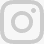

In [62]:
data

<a id='wikipedia'></a>
# <i class="fa fa-location-arrow"></i> The Wikipedia API
The [English Wikipedia API](https://en.wikipedia.org/w/api.php) is one endpoint of the larger [MediaWiki API](https://www.mediawiki.org/wiki/API:Main_page). Other endpoints include the Meta-Wiki, Wikimedia Commons, and German Wikipedia APIs. 

There is plenty of documentation about how to use these APIs directly, but there is also an easy-to-use Python client we can use. The [`wikipedia`](https://wikipedia.readthedocs.io/en/latest/) Python client developed by Jonathan Goldsmith provides us with functionality for reading and parsing data from Wikipedia. 

While in the backend `wikipedia` is still using the MediaWiki API, the front-end interface (what we will work with) is much simpler than if we were to use the API directly.

### Installing `wikipedia`
Likely, up until this point all of the Python packages we've been using have come standard in the Anaconda installation you all have on your machines. 

However, `wikipedia` is not a default package in either base Python or Anaconda. So, we will need to download it for ourselves. 

Usually, Python packages can be found on [PyPI](https://pypi.org/), the official repository for Python packages. Any package found on PyPI can be installed using [`pip`](https://pypi.org/project/pip/), Python's package installer. 

Run the cell below to use `pip`to search PyPI for the `wikipedia` package. 

> Aside   
The `!` at the beginning of the cell tells Jupyter that we want that cell (and that cell only) to be executed on the command line. 

In [ ]:
!pip3 search wikipedia 

Conveniently, the package we are interested in is shown right at the top. We also see that the default version of this package is 1.4.0. To install `wikipedia`, run the cell below. 

You may notice that some extra packages are being installed, or at least looked for. These packages are _requirements_ of the `wikipedia` packages and need to be installed for `wikipedia` to work properly.

In [ ]:
!pip3 install wikipedia 

Once you see a message to the effect of `Successfully installed wikipedia-1.4.0` comment out the cell block above to ensure you don't accidently try to re-install the package. 

If you get an error message, let one of us know so we can help you debug. 

Run the cell below to make sure `wikipedia` was installed successfully. If no errors show up, you are good to go!

In [ ]:
import wikipedia

### Using `wikipedia`
Unlike The Guardian or Twitter APIs, Wikipedia's API doesn't require a token. Instead, everything is publically accessible to anyone. 


We need to be more careful to rate limit. 

#### Searching
Similar to how we search on Wikipedia's website, we can use the API to search for specific content. 

In [ ]:
search_term = 'spelunking'

search_results = wikipedia.search(search_term)

search_results

If we are interested in a particlar page, we can request it specifically using the `page()` function. 

In [ ]:
my_page = wikipedia.page(title=search_results[0])
my_page

At first this result might seem anti-climatic. After all, there really doesn't appear to be any interesting data contained within `my_page`. However, `my_page` actually does contain a lot of information, its just packaged into a `WikipediaPage` object (also known as a class). 

This object stores data such as the page's summary, links, and categories, all structured neatly within the object. Checkout the [`WikipediaPage` documentation](https://wikipedia.readthedocs.io/en/latest/code.html#wikipedia.WikipediaPage) for a full list. 

In [ ]:
my_page.links

In [ ]:
my_page.summary

In the cell below, use a `for` loop to retrieve and store the summaries for each of the 10 pages in `search_results`. 

In [ ]:
# Your Answer Here

#### Jumping Between Pages
Links are inherent in Wikipedia. They connect pages to one another and provide a structure for the site. It also means you can almost always get from one page to another through these links. Checkout [Six Degrees of Wikipedia](https://www.sixdegreesofwikipedia.com) if you have any doubts. 

We can use these links between pages to move page to page, gathering information as we go. The cell below uses the `random` package to select a link at random and display its summary text. 

In [ ]:
import random

# Function for selecting a random linked page
def select_random_link(links):
    total_links = len(links)
    random_num = random.randrange(0, total_links)
    random_page_name = links[random_num]
    random_page = wikipedia.page(random_page_name)
    return random_page


# All links
links = my_page.links

# Select a random linked page
linked_page = select_random_link(links)

# Print Results
print('There is a link from {} --> {}\n'.format(my_page.title, 
                                              linked_page.title))

print("{}'s summary is\n {}".format(linked_page.title,
                                    linked_page.summary))

Above, we took the first step in a ["random walk"](https://en.wikipedia.org/wiki/Random_walk) through Wikipedia. In the cell below use the `select_random_link()` function from above and a loop (`while` or `for`) to perform a random walk with 5 steps.

Feel free to choose any page as a starting point. Print out the title of each page you visit on the random walk. 

In [ ]:
# Your Answer Here

It is fairly easy to image how a random walk, left to its own devices, could carry on indefinitely through Wikipedia making API request after API request. If enough people write random walk code, or other code making many requests, its quite possible we could overwhelm the Wikipedia API. 

When this happens, Wikipedia identifies the IP addresses making the most requests and serves them with an HTTP timeout error. Essentially, Wikipedia punishes the heavy users by returning errors and making them wait until the API is no longer overwhelmed. 

To help mitigate against this, we can make use of the `set_rate_limiting()` function included in the `wikipedia` Python package. 

In [ ]:
wikipedia.set_rate_limiting(rate_limit=True)

Now, any requests we make to the Wikipedia API will be separated by 50 ms (default for the function). If at any point we encounter an HTTP timeout error while using rate limiting, we should adjust the limit using `set_rate_limiting()`'s `min_wait` parameter. 

<a id='twitter'></a>
# <i class="fa fa-location-arrow"></i>  The Twitter API </font>

> **NOTE**: Some of the explanatory text in this section on the Twitter API is excerpted and adapted from John McLevey (2020) <font color="crimson">*Doing Computational Social Science*</font>. London: Sage. 

Twitter has multiple APIs that are available to developers and researchers. The `REST API` can be used to collect information about user accounts and a limited number of historical tweets. For example, you could use the `REST API` to find out information about the account belonging to sociologist Mario Small, such as his Twitter ID number, the description he uses in his bio, the number of followers he has, the number of friends he follows, and who his followers and friends are. In addition to this information, you can collect the text and tweet metadata for his most recent 3,200 tweets. 

Twitter imposes rate limits on access to the REST API, which means that it can be rather slow to collect certain kinds of information, such as information about followers and friends. More specifically, Twitter restricts users to making 15 requests per 15 minutes. The amount of information you can get with each request depends on what exactly you are asking for, which can be a bit confusing when you first start using this API. If you make more requests than permitted within a 15 minute window, Twitter will break your connection to the REST API. However, (1) `Tweepy` simplifies the work needed to stay within the rate limits and avoid disconnection, and (2) you can collect substantially more data per request if you use Twitter's ID numbers rather than screen names. 

Twitter also offers a `Streaming API`, which enables you to download tweets in real time. Unlike the `REST API` which *pulls* historical data from Twitter, the Streaming API *pushes* real time data to us. We receive that data using a `StreamListener` class, which we will discuss shortly. This enables us to collect an enormous amount of data in a short amount of time.

The free version of the Streaming API enables you to collect up to 1% of all tweets produced within 10 milliseconds of your request. If you are looking to use this method to collect a dataset of tweets that are representative of the Twitterverse at any given moment, there are plenty of reasons to be skeptical, the main reason being that Twitter does not disclose how it selects the 1% sample. However, if you are collecting tweets within a specific set of search parameters (e.g. filtered to tweets produced by a list of user accounts, within a geographic region, or containing some specific keyword), then it is possible to collect *all* relevant tweets. This only works if the tweets produced within your search parameters are less than 1% of all tweets posted within 10 milliseconds. Given how massive Twitter is and how much data its users produce, chances are you can stay under 1% and collect all tweets that are relevant to whatever your research question is.

### Accessing the Twitter API

To access the Twitter API, you have to have a Twitter account and register an application at [https://developer.twitter.com](https://developer.twitter.com). If you managed to get your credentials before the start of this workshop, we will use them now. 

On the developer page, you will need to "create an app" and record four pieces of information: (1) Consumer Key, (2) Consumer Secret, (3) Access Token, and (4) Access Token Secret. You can find instructions of how to find these keys online. I am not going to provide step by step instructions here because the layout of the Twitter developer page changes from time to time. Note that Twitter will only display your `ACCESS_TOKEN` and `ACCESS_TOKEN_SECRET` when you first generate them. If you lose them, you will need to generate a new pair, which invalidates the old pair. 

![](img/twitter.jpg)

As we mentioned earlier, you should treat your API keys like **passwords**. It's best not to copy and paste them directly into your scripts where other people will see (and can compromise) them. Instead, we will store our keys in a separate file and read the information into our Python script. To do so, let's create a file called `config_twitter.py` and store our four keys in it. The content of your file should look like this: 

    API_KEY = 'YOUR API KEY'  
    API_TOKEN = 'YOUR API TOKEN'  #(SECRET!)
    ACCESS_TOKEN = 'YOUR ACCESS TOKEN'  
    ACCESS_TOKEN_SECRET = 'YOUR ACCESS TOKEN SECRET'  

In [63]:
import re

# WINDOWS 
# !pip install tweepy

# macOS and Linux 
# !pip3 install tweepy 

import tweepy
import config_twitter

auth = tweepy.OAuthHandler(config_twitter.API_KEY, config_twitter.API_TOKEN)
auth.set_access_token(config_twitter.ACCESS_TOKEN, config_twitter.ACCESS_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

Note that when we use `Tweepy` to authenticate with Twitter, we use the arguments `wait_on_rate_limit=True` and `wait_on_rate_limit_notify=True`. These arguments enable `Tweepy` to do the work of staying within Twitter's rate limits, which simplifies our work considerably. For that reason, I suggest you also use them.

Once those cells have been executed, you are authenticated with Twitter and can start making requests. Let's start with some requests to the REST API to get data on user accounts.

### The `REST API`

First, we will collect some data on user accounts and historical tweets using the REST API. There is a `csv` file in the `data` subdirectory of the course folder. It contains the Twitter Screen Names for the leaders of UK political parties as of August 14, 2019. The leaders are:

* **Boris Johnson**, Leader of the Conservative Party    
* **Jeremy Corbyn**, Leader of the Labour Party
* **Nicola Sturgeon**, Leader of the Scottish National Party  
* **Jo Swinson**, Leader of the Liberal Democrats  
* **Arlene Foster**, Leader of the Democratic Unionist Party 
* **Liz Saville Roberts**, Leader of Plaid Cymru - Party of Wales 
* **Caroline Lucas**, Leader of the Green Party of England and Wales 

We will use the Screen Names from this `csv` file throughout the module. Feel free to edit the file to include a different set of Screen Names. The code in this module will work regardless of which accounts you are collecting data from. 

In [64]:
accounts = pd.read_csv('data/twitter_accounts.csv')
accounts = accounts['Screen Name'].tolist()
accounts

['BorisJohnson',
 'jeremycorbyn',
 'NicolaSturgeon',
 'joswinson',
 'DUPleader',
 'LSRPlaid',
 'CarolineLucas']

### Getting User Account Metadata

In [66]:
ids = [api.get_user(i) for i in accounts]
pp.pprint(ids)

[User(_api=<tweepy.api.API object at 0x7f5f6376a3c8>, _json={'id': 3131144855, 'id_str': '3131144855', 'name': 'Boris Johnson', 'screen_name': 'BorisJohnson', 'location': 'United Kingdom', 'profile_location': None, 'description': 'Prime Minister of the United Kingdom and @Conservatives leader. Member of Parliament for Uxbridge and South Ruislip.', 'url': 'https://t.co/f6UKB0HllP', 'entities': {'url': {'urls': [{'url': 'https://t.co/f6UKB0HllP', 'expanded_url': 'http://conservatives.com/join', 'display_url': 'conservatives.com/join', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1553790, 'friends_count': 453, 'listed_count': 5578, 'created_at': 'Wed Apr 01 20:15:49 +0000 2015', 'favourites_count': 436, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 3268, 'lang': None, 'status': {'created_at': 'Tue Mar 03 10:46:31 +0000 2020', 'id': 1234792261650669568, 'id_str': '1234792261650669568', 'text': 

In [68]:
meta = [[i.name, i.screen_name, i.id, i.description, i.location, i.followers_count, i.friends_count, i.protected] for i in ids]

meta = pd.DataFrame(meta, columns = ['Person', 'Handle', 'Twitter ID Number', 'Description', 'Location', 'Number of Followers', 'Number of Friends', 'Protected'])
meta.to_csv('output/twitter_accounts_uk_leaders.csv', index = False)
meta

Person          Handle  Twitter ID Number  \
0                      Boris Johnson    BorisJohnson         3131144855   
1                      Jeremy Corbyn    jeremycorbyn          117777690   
2                    Nicola Sturgeon  NicolaSturgeon          160952087   
3                         Jo Swinson       joswinson           14933304   
4                      Arlene Foster       DUPleader          275799277   
5  Liz Saville Roberts AS/MP 🏴󠁧󠁢󠁷󠁬󠁳󠁿        LSRPlaid         2350624098   
6                     Caroline Lucas   CarolineLucas           80802900   

                                         Description  \
0  Prime Minister of the United Kingdom and @Cons...   
1                        Leader of the Labour Party.   
2  First Minister of Scotland, @theSNP Leader and...   
3  Scottish. British. European. Runner. Feminist....   
4  First Minister of Northern Ireland | Democrati...   
5  Aelod Seneddol @plaid_cymru Dwyfor Meirionnydd...   
6  Green MP for Brighton Pavilion, former leader ...   

                             Location  Number of Followers  Number of Friends  \
0                      United Kingdom              1553790                453   
1                                  UK              2372463               2758   
2                   Glasgow, Scotland              1058188               4724   
3        East Dunbartonshire & London               173416               2898   
4  County Fermanagh, Northern Ireland                77859               1023   
5                          Dolgellau                 13419               2457   
6                            Brighton               451626               5994   

   Protected  
0      False  
1      False  
2      False  
3      False  
4      False  
5      False  
6      False

In [69]:
meta.head(20)

Person          Handle  Twitter ID Number  \
0                      Boris Johnson    BorisJohnson         3131144855   
1                      Jeremy Corbyn    jeremycorbyn          117777690   
2                    Nicola Sturgeon  NicolaSturgeon          160952087   
3                         Jo Swinson       joswinson           14933304   
4                      Arlene Foster       DUPleader          275799277   
5  Liz Saville Roberts AS/MP 🏴󠁧󠁢󠁷󠁬󠁳󠁿        LSRPlaid         2350624098   
6                     Caroline Lucas   CarolineLucas           80802900   

                                         Description  \
0  Prime Minister of the United Kingdom and @Cons...   
1                        Leader of the Labour Party.   
2  First Minister of Scotland, @theSNP Leader and...   
3  Scottish. British. European. Runner. Feminist....   
4  First Minister of Northern Ireland | Democrati...   
5  Aelod Seneddol @plaid_cymru Dwyfor Meirionnydd...   
6  Green MP for Brighton Pavilion, former leader ...   

                             Location  Number of Followers  Number of Friends  \
0                      United Kingdom              1553790                453   
1                                  UK              2372463               2758   
2                   Glasgow, Scotland              1058188               4724   
3        East Dunbartonshire & London               173416               2898   
4  County Fermanagh, Northern Ireland                77859               1023   
5                          Dolgellau                 13419               2457   
6                            Brighton               451626               5994   

   Protected  
0      False  
1      False  
2      False  
3      False  
4      False  
5      False  
6      False

### Getting Historical Tweet Metadata

Below I have written a function called `get_tweet_data` that takes a user screen name and requests the tweets from the `user_timeline` via Twitter's REST API. It collects some (not all) of the available metadata for each tweet and adds them to a dictionary. Then, after all available Tweets have been collected, it appends each Tweet dict to a list call Tweets. The list of Tweet dicts is returned when the function is run. 

In [70]:
def get_tweet_data(user, user_meta=False):
    tweets = []
    
    for tw in tweepy.Cursor(api.user_timeline, screen_name=user, exclude_replies=False, count = 200, tweet_mode = 'extended').items():
        tdict = {}
        
        tdict['text'] = tw.full_text.replace('\n', '').strip()    
        tdict['tweet_id'] = tw.id
        tdict['retweet_count'] = tw.retweet_count
        tdict['fav_count'] = tw.favorite_count
        tdict['user_id'] = tw.user.id        
        tdict['user_screen_name'] = tw.user.screen_name
        tdict['time'] = tw.created_at
        tdict['hashtags'] = [hashtag['text'] for hashtag in tw.entities['hashtags']]
        tdict['user_mentions'] = [user['screen_name'] for user in tw.entities['user_mentions']]
        
        if user_meta is True:
            tdict['location'] = tw.user.location
            tdict['user_description'] = tw.user.description
            tdict['user_url'] = tw.user.url 
        else:
            pass
        
        # find links
        tdict['links_in_tweet'] = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tw.full_text)
        # re from stackoverflow 
        
        tdict['link_to_tweet'] = 'https://twitter.com/{}/status/{}'.format(tw.user.screen_name, tw.id)
        
        tweets.append(tdict)
    
    return tweets

Let's pick one user account to collect historical tweets from. Later, we will apply our solution to the rest of the accounts in our `csv` file. In this example, we will collect user Tweets from [Nicola Sturgeon](https://en.wikipedia.org/wiki/Nicola_Sturgeon), the leader of the [Scottish National Party](https://en.wikipedia.org/wiki/Scottish_National_Party) and the First Minister of Scotland. 

In [71]:
ns_tweets = get_tweet_data('NicolaSturgeon', user_meta = True)

In [72]:
ns_tweets

[{'text': 'RT @scotgov: Today representatives from @OfficialSYP and @Creative_Voices met with First Minister @NicolaSturgeon and the full Scottish Cab…',
  'tweet_id': 1234871202033885187,
  'retweet_count': 3,
  'fav_count': 0,
  'user_id': 160952087,
  'user_screen_name': 'NicolaSturgeon',
  'time': datetime.datetime(2020, 3, 3, 16, 0, 12),
  'hashtags': [],
  'user_mentions': ['scotgov',
   'OfficialSYP',
   'Creative_Voices',
   'NicolaSturgeon'],
  'location': 'Glasgow, Scotland',
  'user_description': 'First Minister of Scotland, @theSNP Leader and MSP for Glasgow Southside. Loves 📚',
  'user_url': 'https://t.co/viEKYxG7er',
  'links_in_tweet': [],
  'link_to_tweet': 'https://twitter.com/NicolaSturgeon/status/1234871202033885187'},
 {'text': 'RT @OfficialSYP: MSYPs and MCPs are ready for our 4th annual #CabinetTakeover with @scotgov. We’re bringing super important issues which…',
  'tweet_id': 1234840183931056133,
  'retweet_count': 33,
  'fav_count': 0,
  'user_id': 160952087,
 

In [73]:
for tweet in ns_tweets:
    print('Tweet: {}'.format(tweet['text']))
    print('Number of Retweets: {}'.format(str(tweet['retweet_count'])))
    print('Number of Favs: {}'.format(str(tweet['fav_count'])))
    print('Users Mentioned: {}'.format(list(tweet['user_mentions'])))
    print('Hashtags: {}'.format(list(tweet['hashtags'])))
    print('\n')

Tweet: RT @scotgov: Today representatives from @OfficialSYP and @Creative_Voices met with First Minister @NicolaSturgeon and the full Scottish Cab…
Number of Retweets: 3
Number of Favs: 0
Users Mentioned: ['scotgov', 'OfficialSYP', 'Creative_Voices', 'NicolaSturgeon']
Hashtags: []


Tweet: RT @OfficialSYP: MSYPs and MCPs are ready for our 4th annual #CabinetTakeover with @scotgov. We’re bringing super important issues which…
Number of Retweets: 33
Number of Favs: 0
Users Mentioned: ['OfficialSYP', 'scotgov']
Hashtags: ['CabinetTakeover']


Tweet: RT @BBCScotlandNews: “It’s about giving reassurance to the public that this is a serious situation but one that governments are taking seri…
Number of Retweets: 58
Number of Favs: 0
Users Mentioned: ['BBCScotlandNews']
Hashtags: []


Tweet: RT @scotgov: The @scotgov, @WelshGovernment, @niexecutive and @GOVUK have jointly published an Action Plan setting out a collective approac…
Number of Retweets: 128
Number of Favs: 0
Users Mentioned: ['scot

Users Mentioned: ['theSNP']
Hashtags: []


Tweet: RT @theSNP: SNP WIN! That's 47!@IBlackfordSNP, SNP Westminster Leader, wins Ross, Skye and Lochaber for the SNP. #GE2019 #SNPWin https://…
Number of Retweets: 212
Number of Favs: 0
Users Mentioned: ['theSNP', 'IBlackfordSNP']
Hashtags: ['GE2019', 'SNPWin']


Tweet: With @theSNP magnificent seven Glasgow MPs - a clean sweep again in my home city makes me happy! https://t.co/9jnGbBVptD
Number of Retweets: 790
Number of Favs: 7193
Users Mentioned: ['theSNP']
Hashtags: []


Tweet: RT @theSNP: SNP WIN! SNP's Depute Westminster Leader @KirstySNP wins Aberdeen North for the SNP. #GE2019 #SNPWin https://t.co/nbBxfMvXfd
Number of Retweets: 247
Number of Favs: 0
Users Mentioned: ['theSNP', 'KirstySNP']
Hashtags: ['GE2019', 'SNPWin']


Tweet: RT @theSNP: SNP WIN! That's 19!@AlynSmith wins Stirling for the SNP. #GE2019 #SNPWin https://t.co/7lzF2KYqEE
Number of Retweets: 346
Number of Favs: 0
Users Mentioned: ['theSNP', 'AlynSmith']
Hashtags: ['GE20

Number of Favs: 0
Users Mentioned: ['theSNP', 'NicolaSturgeon']
Hashtags: []


Tweet: RT @lesleympix: Great fun today including a sing along with @NicolaSturgeon @onedalkeith #GE2019 @Dalkeith_Arts #electioncampaigntrail #dal…
Number of Retweets: 53
Number of Favs: 0
Users Mentioned: ['lesleympix', 'NicolaSturgeon', 'onedalkeith', 'Dalkeith_Arts']
Hashtags: ['GE2019', 'electioncampaigntrail']


Tweet: RT @onedalkeith: Great fun had by all during our visit from the First Minister @NicolaSturgeon today. A tour around the building, followed…
Number of Retweets: 24
Number of Favs: 0
Users Mentioned: ['onedalkeith', 'NicolaSturgeon']
Hashtags: []


Tweet: Stay safe wherever you are this #BonfireNight - my particular thanks to @GlasgowSEPolice @scotfire_glasgo @Poll_Trust and the local community council for all the work in Pollokshields to - I hope - avoid a repeat of last year. https://t.co/ipw8Nt6nPD
Number of Retweets: 56
Number of Favs: 340
Users Mentioned: ['GlasgowSEPolice', 'scotfire_

Number of Favs: 0
Users Mentioned: ['thesundaytimes', 'TheSTStyle']
Hashtags: []


Tweet: RT @PickardJE: The Rudd resignation letter is devastating for Boris Johnson, describing his “short sighted culling” of Tory MPs last week a…
Number of Retweets: 565
Number of Favs: 0
Users Mentioned: ['PickardJE']
Hashtags: []


Tweet: RT @ShippersUnbound: BREAKING: Amber Rudd has resigned the Conservative whip and plans to run as an independent Conservative at the general…
Number of Retweets: 1894
Number of Favs: 0
Users Mentioned: ['ShippersUnbound']
Hashtags: []


Tweet: Been looking forward to these books, by two of my very favourite authors ⁦@MargaretAtwood⁩ and Edna O’Brien, for so long. Now I can’t decide which one to read first - but that’s a nice dilemma. #Saturdaynightreads 📚 https://t.co/QcpjXYcaCq
Number of Retweets: 103
Number of Favs: 1479
Users Mentioned: ['MargaretAtwood']
Hashtags: ['Saturdaynightreads']


Tweet: Great photo of @JohnSwinney at the Perth independence march today. h

Number of Retweets: 68
Number of Favs: 0
Users Mentioned: ['RadioTayNews', 'NicolaSturgeon']
Hashtags: []


Tweet: RT @ScotGovFM: FM @NicolaSturgeon has officially opened the @UniWestScotland Lanarkshire campus.Students and staff gave her a tour of the…
Number of Retweets: 97
Number of Favs: 0
Users Mentioned: ['ScotGovFM', 'NicolaSturgeon', 'UniWestScotland']
Hashtags: []


Tweet: @LindaFSemple Is that a dare?
Number of Retweets: 3
Number of Favs: 41
Users Mentioned: ['LindaFSemple']
Hashtags: []


Tweet: You are so right @SueJohnGWL - our apologies - the wonderful @womenslibrary was a well deserved finalist last year. https://t.co/ktxrtkqIye
Number of Retweets: 40
Number of Favs: 291
Users Mentioned: ['SueJohnGWL', 'womenslibrary']
Hashtags: []


Tweet: RT @tennisscotland: Congratulations to @Andy_Murray and @feliciano_lopez as they win the men’s doubles at the #FeverTreeChampionships at @Q…
Number of Retweets: 102
Number of Favs: 0
Users Mentioned: ['tennisscotland', 'andy_murray', 

Number of Favs: 0
Users Mentioned: ['rosscolquhoun', 'Feorlean']
Hashtags: ['SNP19']


Tweet: RT @erikgeddes: Morning! Some more on that polling: An independence referendum would be too close to call - according to a stunning new…
Number of Retweets: 94
Number of Favs: 0
Users Mentioned: ['erikgeddes']
Hashtags: []


Tweet: Today’s @YouGov poll in @thetimes is amazing. 23 point lead for @theSNP in Westminster election, 24 point lead for @ScotParl and 25 point lead for Euro elections. And #Indy at 49%. Happy #SNP19
Number of Retweets: 1831
Number of Favs: 6759
Users Mentioned: ['YouGov', 'thetimes', 'theSNP', 'ScotParl']
Hashtags: ['Indy', 'SNP19']


Tweet: RT @rosscolquhoun: 🇪🇺 The latest @thetimesscot @YouGov Euro poll:SNP: 40%Lab: 15%Brexit: 14%Con: 9%#SNP19
Number of Retweets: 193
Number of Favs: 0
Users Mentioned: ['rosscolquhoun', 'thetimesscot', 'YouGov']
Hashtags: ['SNP19']


Tweet: RT @rosscolquhoun: 🏴󠁧󠁢󠁳󠁣󠁴󠁿 The latest @thetimesscot @YouGov poll on independence: Yes: 49%No: 51%

Tweet: Watching this makes me feel sad and angry in equal measure. Tove, Danish born, has lived in Scotland for 59 years and asks this reasonable question - “at 87, why do I have to register?” The one word answer is “Brexit”. Tove - this is your home, Scotland wants you here. https://t.co/gsUFJ4l5TM
Number of Retweets: 4382
Number of Favs: 13014
Users Mentioned: []
Hashtags: []


Tweet: RT @qmscotland: And here it is - the new Scotch Beef 'Know Your Beef' TV advert! Tune into Coronation Street and Who Wants to Be a Milliona…
Number of Retweets: 115
Number of Favs: 0
Users Mentioned: ['qmscotland']
Hashtags: []


Tweet: Great new promotional ad for #scotchbeef. @qmscotland https://t.co/8OHoRTuTrg
Number of Retweets: 112
Number of Favs: 275
Users Mentioned: ['qmscotland']
Hashtags: ['scotchbeef']


Tweet: RT @ScotGovFM: FM @NicolaSturgeon today kicked off Scottish Apprenticeship Week by visiting @FVCollege to meet female engineering apprentic…
Number of Retweets: 102
Number of Favs: 0
Us

`Pandas` can construct a `dataframe` from a list of dicts, which means we can easily store our tweet data in a `dataframe`. 

In [74]:
ns_df = pd.DataFrame(ns_tweets)
ns_df.head()

text             tweet_id  \
0  RT @scotgov: Today representatives from @Offic...  1234871202033885187   
1  RT @OfficialSYP: MSYPs and MCPs are ready for ...  1234840183931056133   
2  RT @BBCScotlandNews: “It’s about giving reassu...  1234833955918110726   
3  RT @scotgov: The @scotgov, @WelshGovernment, @...  1234832665880223744   
4  RT @WomensPrize: We're delighted to reveal thi...  1234743901883453441   

   retweet_count  fav_count    user_id user_screen_name                time  \
0              3          0  160952087   NicolaSturgeon 2020-03-03 16:00:12   
1             33          0  160952087   NicolaSturgeon 2020-03-03 13:56:56   
2             58          0  160952087   NicolaSturgeon 2020-03-03 13:32:11   
3            128          0  160952087   NicolaSturgeon 2020-03-03 13:27:04   
4            960          0  160952087   NicolaSturgeon 2020-03-03 07:34:21   

            hashtags                                      user_mentions  \
0                 []  [scotgov, OfficialSYP, Creative_Voices, Nicola...   
1  [CabinetTakeover]                             [OfficialSYP, scotgov]   
2                 []                                  [BBCScotlandNews]   
3                 []  [scotgov, scotgov, WelshGovernment, niexecutiv...   
4      [WomensPrize]                                      [WomensPrize]   

            location                                   user_description  \
0  Glasgow, Scotland  First Minister of Scotland, @theSNP Leader and...   
1  Glasgow, Scotland  First Minister of Scotland, @theSNP Leader and...   
2  Glasgow, Scotland  First Minister of Scotland, @theSNP Leader and...   
3  Glasgow, Scotland  First Minister of Scotland, @theSNP Leader and...   
4  Glasgow, Scotland  First Minister of Scotland, @theSNP Leader and...   

                  user_url links_in_tweet  \
0  https://t.co/viEKYxG7er             []   
1  https://t.co/viEKYxG7er             []   
2  https://t.co/viEKYxG7er             []   
3  https://t.co/viEKYxG7er             []   
4  https://t.co/viEKYxG7er             []   

                                       link_to_tweet  
0  https://twitter.com/NicolaSturgeon/status/1234...  
1  https://twitter.com/NicolaSturgeon/status/1234...  
2  https://twitter.com/NicolaSturgeon/status/1234...  
3  https://twitter.com/NicolaSturgeon/status/1234...  
4  https://twitter.com/NicolaSturgeon/status/1234...

In [ ]:
ns_df[['text', 'retweet_count', 'hashtags', 'user_mentions']].to_csv('output/nicola_sturgeon_tweets.csv', index = False)

## Working with Links from Tweets

Many tweets contain links to other tweets, and to content external to Twitter. There is potentially a lot of interesting and useful information that we can gather from these links, but we have to do some extra work to get it. 

First, we need to identify links in the tweets themselves. There are a number of ways to do this, including using a regular expression (which we do in one of the custom functions below). The resulting links have been shortened by Twitter (e.g. [https://t.co/RmUDsFf3em](https://t.co/RmUDsFf3em). In order to know what content a Tweet is linking to, we need to tell Python to follow the link. This will trigger a redirect to the linked content. We can then tell Python to tell us what the *actual* link is. Finally, we can use a package like `tldextract` to parse the actual link and return the top-level domain (e.g. Twitter, the New York Times, etc.). 

Let's define a couple of functions to (1) get unique links from a collection of Tweets and then (2) process the urls by following redirections and extracting the top-level domain. 

In [75]:
from urllib.request import urlopen
import tldextract

def get_unique_urls(tweet_data):
    """
    Retrieve the links from tweet data, flattens the list of list to a set of unique urls.
    
    We will use the following `flatten` function, which was shared by 
    [Alex Martelli on StackOverflow](https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists). 
    In this function, `l` is the outer list.
    """
    flatten = lambda l: [item for sublist in l for item in sublist]
    urls = list(set(flatten([tweet['links_in_tweet'] for tweet in tweet_data])))
    return urls

In [76]:
ul = get_unique_urls(ns_tweets)

test_ul = ul[:15]
test_ul

['https://t.co/HIXgv8RWmr',
 'https://t.co/lqZFqMLDkP',
 'https://t.co/gsUFJ4l5TM',
 'https://t.co/IDzRfvQnHy',
 'https://t.co/5eG1zBz8NS',
 'https://t.co/f6f3zEpzOu',
 'https://t.co/wguTWwsiQT',
 'https://t.co/lyUkEz1eJH',
 'https://t.co/j3Ny0e1kyY',
 'https://t.co/68kSn1Gg4K',
 'https://t.co/zpiRR1t50G',
 'https://t.co/03Y45NoPng',
 'https://t.co/ygDzO8ynIH',
 'https://t.co/inT8HPV0nP',
 'https://t.co/7r0l']

The next step requires identifying the *actual* link by following the shortened link, triggering a redirection, and then parsing the url string to identify the top-level domain. We can do this in a single function, `process_urls`. One limitation of this approach is that it can take some time to run. Depending on the speed of your network connection, it can take a little under a second to process each url. If you are feeding a long list of urls into this function, you should expect to wait a little while.

In [77]:
def process_urls(url):
    """
    Accepts a url string that has been shortened by Twitter. 
    Gets the actual link, parses it, returns a dict with 
    the actual link, the domain, the suffix, and any subdomain.
    Of course will work with other types of shortened links as well. 
    
    This function will take a while to run on a large collection of links because each one 
    has to be opened, loaded, and parsed. Opening and loading speed will vary depending on 
    your network connection. 
    """
    ld = {}
    ld['original_short'] = url
    
    try:
        opened = urlopen(url)
        ld['redirected'] = opened.geturl()
        ld['valid_url'] = 'Yes'
    except:
        ld['valid_url'] = 'No'
    
    if ld['valid_url'] is 'Yes':
        ext = tldextract.extract(ld['redirected'])
        ld['domain'] = ext.domain
        ld['subdomain'] = ext.subdomain
        ld['suffix'] = ext.suffix
    else:
        ld['redirected'] = 'Not a valid url'
        ld['domain'] = 'Domain missing'
        ld['subdomain'] = 'Subdomain missing'
        ld['suffix'] = 'Suffix missing'
   
    return ld

In [78]:
for l in test_ul:
    proc = process_urls(l)
    print(proc['original_short'])
    print(proc['redirected'])
    print(proc['domain'])
    print('\n')

unable to cache TLDs in file /usr/local/lib/python3.6/dist-packages/tldextract/.tld_set: [Errno 13] Permission denied: '/usr/local/lib/python3.6/dist-packages/tldextract/.tld_set'


https://t.co/HIXgv8RWmr
https://twitter.com/NicolaSturgeon/status/1131468718251413504/photo/1
twitter


https://t.co/lqZFqMLDkP
https://twitter.com/bbcalba/status/1157736167909072898/video/1
twitter


https://t.co/gsUFJ4l5TM
https://twitter.com/stvnews/status/1102650703909187585
twitter


https://t.co/IDzRfvQnHy
https://twitter.com/coinneachmac/status/1156814448574771200
twitter


https://t.co/5eG1zBz8NS
https://twitter.com/NicolaSturgeon/status/1191730992849002498/photo/1
twitter


https://t.co/f6f3zEpzOu
https://twitter.com/scotgov/status/1141736919174438913
twitter


https://t.co/wguTWwsiQT
https://twitter.com/yesscot/status/1121052885742231553
twitter


https://t.co/lyUkEz1eJH
https://twitter.com/jeremycorbyn/status/1194683810585174016
twitter


https://t.co/j3Ny0e1kyY
https://twitter.com/daily_record/status/1191163464707956736
twitter


https://t.co/68kSn1Gg4K
https://twitter.com/scotlandteam/status/1178645929873809409
twitter


https://t.co/zpiRR1t50G
https://twitter.com/thecommo

Printing data to screen is occasionally useful, but most of the time we want to get the data into a format that we can easily store or analyze. We can use list comprehension to process each link in our full `ul` object. The result will be a list of dictionaries, where each dictionary corresponds to a link. We can once again use `Pandas` to get this into a `dataframe` for each analysis or storage. 

You should expect the code below to take some time to run. Please be patient, and maybe get some tea or coffee while you wait. ☕️ ☕️ ☕️

In [79]:
import time
start_time = time.time()
processed = [process_urls(l) for l in ul]
print("--- %s seconds ---" % (time.time() - start_time))

--- 1058.3108749389648 seconds ---


In [ ]:
sturgeon_urls = pd.DataFrame(processed)
sturgeon_urls.sample(20)

In [ ]:
sturgeon_urls.to_csv('output/sturgeon_urls.csv', index = False)

We can use `Pandas` (discussed in detail tomorrow) to quickly check to see what the most commonly linked domains are in Sturgeon's most recent 3,200 Tweets (recall this is the limit for historical Tweets accessed via the REST API). 

In [ ]:
sturgeon_urls.groupby('domain').size().sort_values(ascending = False)[:10]

## Getting Friend and Follower Data

So far we have collected general account metadata and historical tweet data and metadata (including hashtags, mentioned users, and links to external content). We *also* want to collect data on friends (who an account follows) and followers (who follows a given account). 

This requires making yet another request to the REST API. When we make the request, we can use Screen Names *or* Twitter IDs, which are unique strings that a user cannot modify. If we want to collect the most data possible within the shortest amount of time, then we will use Twitter IDs. 

In [ ]:
def get_friends(user_id):
    """
    Accepts a Twitter user ID number and gets a list of people the account follows ('friends'). 
    Could be screen name instead, but that is much slower and hits rate limiting faster. Count 
    would have to drop down to 200. 
    """
    friends = []
    cursor = tweepy.Cursor(api.friends_ids, id=user_id, count=5000) 
    for page in cursor.pages():
        for friend in page:
            friends.append(friend)
    return friends

Let's use our function to get a list of accounts that Nicola Sturgeon's account follows. We know from earlier (see the `meta` object) that her Twitter ID is `160952087`. 

In [ ]:
sturgeon_friends = get_friends('160952087')
print('There are currently {} accounts following Nicola Sturgeon on Twitter.'.format(str(len(sturgeon_friends))))

In [ ]:
sturgeon_friends

We now have a list of the accounts that follow Nicola Sturgeon. Let's take the first 5 and retrieve metadata about those accounts. We could do it for the full list, of course, but it will take a while because of Twitter's rate limiting. 

In [ ]:
sturgeon_friends_test = sturgeon_friends[:5]
sturgeon_friends_test

In [ ]:
sturgeon_friends_meta = [api.get_user(i) for i in sturgeon_friends_test]

In [ ]:
sf_meta = [[i.name, i.screen_name, i.id, i.description, i.location, i.followers_count, i.friends_count, i.protected] for i in sturgeon_friends_meta]
pd.DataFrame(sf_meta)

We can, of course, do this for all of Nicola Sturgeon's friends. We can also do it for her friends' friends! And we can do it for the other politicians included in this module, and any other public Twitter accounts. All we need is a lot of time and patience. 

# The Streaming API <a id='stream'></a>

The other API that researchers routinely use when collecting Twitter data is the Streaming API. As you now know, the Streaming API is rather different than the REST API. Unlike the REST API (which *pulls* data from Twitter), the Streaming API recieves data that is *pushed* from Twitter in real time. This requires defining a special listener class. The code block below defines the `MyStreamListener` class discussed in the assigned reading. Once you execute that code cell, you are ready to start recieving real time streaming data from Twitter. The listener will append new tweet data to a csv file called `streaming_tweet_data.csv`, which is stored in the `output` directory. 

In [ ]:
SEP = ';'
csv = open('output/streaming_tweet_data.csv', 'a')
csv.write('Date' + SEP + 'Tweet' + SEP + 'Number of Followers' + SEP + 'Number of Friends' + SEP + 'Handle' + '\n')

class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        if hasattr(status, 'retweeted_status'):
            try:
                tweet = status.retweeted_status.extended_tweet["full_text"]
            except:
                tweet = status.retweeted_status.text
        else:
            try:
                tweet = status.extended_tweet["full_text"]
            except AttributeError:
                tweet = status.text
        
        date = status.created_at.strftime("%Y-%m-%d-%H:%M:%S")
        follower = str(status.user.followers_count)
        friend = str(status.user.friends_count)
        name = status.user.screen_name
        
        csv.write(date + SEP + tweet.strip().replace("\n","").replace('\r','').replace(';',',') + SEP + follower + SEP + friend + SEP + name + '\n')

To start streaming data, we have to initialize the class object and then provide some sort of search filter. In this case, we will stream tweets about Brexit. Remember, these tweets will *not* print to screen. They will be written to the `streaming_tweet_data.csv` file. 

I suggest you run the two cells below and then walk away for 5 minutes or so. Come back, **'interrupt' the Python kernel** (you can do this by pressing the square stop button in the Jupyter toolbar), and check the content of the `csv` file.

In [ ]:
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

In [ ]:
myStream.filter(track=['brexit'])

When you are ready to stop streaming data, you will have to 'interrupt' the Python kernel. Otherwise, it will keep collecting data from Twitter until the connection is somehow severed. You can do this by clicking the square black button at the top of your Jupyter Notebook, or by selecting 'Interrupt' from the Kernel menu at the top of the notebook. 

> **Important note!** You may get a `TweepError: Stream object already connected!` error when executing this part of the notebook. This is because Twitter will only allow one connection to the Streaming API at a time. If you get that error, then you should select "Restart & Clear Output" from the Kernel menu at the top of the notebook. You will need to re-import the packages and re-authenticate with Twitter by executing those cells at the top of the notebook. Then you can stream new data. Just don't connect the previous streaming object in the new session! 

There are, of course, more sophisticated ways of doing this. [Ted Chen](https://tedhchen.com/), for example, has developed [a set of Python tools for working with the Streaming API](https://github.com/tedhchen/twitter_streaming_tools) that are very well-suited to large-scale empirical research projects. This level of depth is outside of the scope of this class, but (1) you can learn a lot from studying repos like Ted's, and (2) you can learn more from *Doing Computational Social Science* and other texts that cover APIs for social scientific research. 

<a id='key_points'></a>
## Key Points   
You should now know: 
* The differences between working with an API directly and a API client.
* The risks associated with sharing API tokens & a method for keeping them out of python scripts. 
* How to save request results to a file & the importance of doing so. 
* Why its important to abide by rate limits. 
* How to install python packages using `pip`.
* How to automate API requests using loops.
